In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook

In [2]:
# Load the spam data
data = pd.read_csv('../data/spam.data',sep=' ',header=None)
train_test = pd.read_csv('../data/spam.traintest',header=None)

# Split in train/test
train_data = data[train_test.values==0]
test_data = data[train_test.values==1]

# Shuffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [3]:
X_train = train_data.iloc[:,0:56].values
y_train = train_data.iloc[:,57].values

X_test = test_data.iloc[:,0:56].values
y_test = test_data.iloc[:,57].values

In [4]:
# Standaraize data
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

/home/amit/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<IPython.core.display.Javascript object>


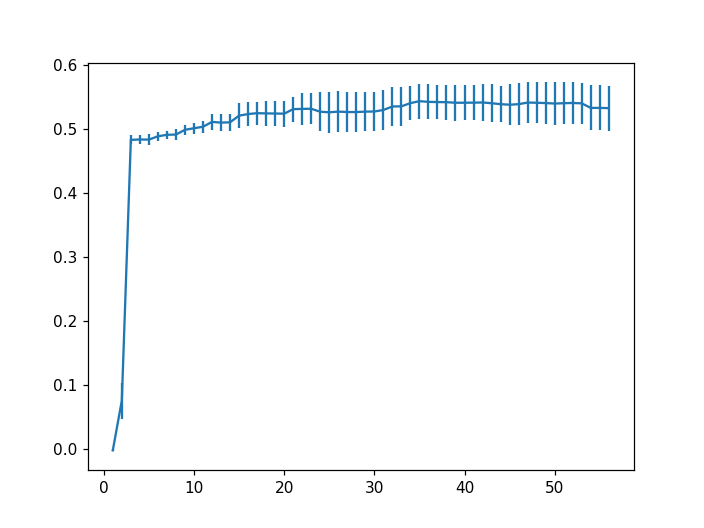

<ErrorbarContainer object of 3 artists>

In [5]:
# Using GridSearch
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)

# Add columns with 1 for constant
X_train_scaled_pca = sm.add_constant(X_train_scaled_pca)

# Applying PCA gives
p = X_train_scaled.shape[1]

fig,ax = plt.subplots()
# Now let's introduce PCA conponenents one -by-one
model = linear_model.LinearRegression()
scores = [cross_val_score(model, X_train_scaled_pca[:,:ncol], y_train, cv=5).mean()
        for ncol in np.arange(1,p+1)]
scores_std = [cross_val_score(model, X_train_scaled_pca[:,:ncol], y_train, cv=5).std()
        for ncol in np.arange(1,p+1)]

ax.errorbar(np.arange(1,p+1), scores,yerr=scores_std)

### Model based on highest cross validation score

In [6]:
ind_max = np.argmax(scores)
n_components = np.arange(1,p+1)[ind_max]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA(n_components=n_components)),
                 ('regression', LinearRegression())])

pipe.fit(X_train_scaled,y_train)

y_pred = np.array(pipe.predict(X_test_scaled) > 0.5, dtype=int)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.14
Variance score: 0.42
